In [1]:
import pandas as pd
import numpy as np

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
target =pd.read_csv('target.csv')

In [3]:
numerical.isna().sum()

TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

In [4]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

In [5]:
target.isna().sum()

TARGET_B    0
TARGET_D    0
dtype: int64

In [6]:
target['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [7]:
target['TARGET_D'].value_counts()

0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: TARGET_D, Length: 71, dtype: int64

In [9]:
categorical.STATE.value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [10]:
categorical.GENDER.value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [11]:
numerical.shape

(95412, 315)

In [12]:
#Lets concatenate all the data together first
data = pd.concat([numerical, categorical, target], axis = 1)
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,96,2,96,2,96,2,96,2,0,0.0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,96,3,96,3,96,3,96,3,0,0.0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,96,3,95,1,96,10,94,10,0,0.0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,90,11,96,8,97,1,86,12,1,18.0


In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

display(categoricalX.head())


encoder = OneHotEncoder(drop='first',handle_unknown='ignore').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX)
encoded_categorical = pd.DataFrame.sparse.from_spmatrix(encoded_categorical)
encoded_categorical.columns = encoder.get_feature_names_out(categoricalX.columns)
encoded_categorical
X = pd.concat([numericalX, encoded_categorical], axis = 1)
display(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0,60.000000,5,9,0,0,39,34,18,10,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
X.isna().any()

TCODE         False
AGE           False
INCOME        False
WEALTH1       False
HIT           False
              ...  
GEOCODE2_D    False
DOMAIN_A_R    False
DOMAIN_A_S    False
DOMAIN_A_T    False
DOMAIN_A_U    False
Length: 355, dtype: bool

In [17]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [18]:
# for upsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

# Manual way to upsample category 1:
category_1 = trainset[trainset['TARGET_B']==1].sample(len(trainset[trainset['TARGET_B']==0]), replace = True)
print(category_1.shape)

category_0 = trainset[trainset['TARGET_B']== 0 ]
trainset_new = pd.concat([category_0, category_1], axis = 0)
trainset_new = trainset_new.sample(frac =1) #randomize the rows


(72486, 356)


In [19]:
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
data = data.reset_index(drop=True)
print(X_train.shape)

(144972, 355)


In [20]:
#Upsampling appears to have worked
y_train.value_counts()

1    72486
0    72486
Name: TARGET_B, dtype: int64

In [21]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


The R2 for the Random Forest in the TRAIN set is 0.62


C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


The R2 for the Random Forest in the TEST  set is 0.60


C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10914,  7169],
       [  437,   563]], dtype=int64)

In [27]:
# For cross validation
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                            random_state =42)

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with

The mean R2 of the folds was 0.62


C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [82]:
cross_val_scores

array([0.61560215, 0.61091185, 0.62585362, 0.62502587, 0.61509278,
       0.62199076, 0.62399117, 0.62061116, 0.62675036, 0.61819687])

The confusion matrix on the TRAIN set is: 


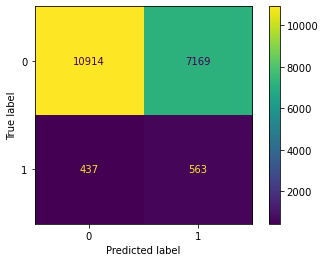

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_test, y_pred)
cmplot = ConfusionMatrixDisplay(cm_train,display_labels=clf.classes_);
cmplot.plot()
plt.show()

Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [29]:
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

So in this case 0 is not responded to mailing list, and 1 is responded to mailing list. And from the confusion matrix above it apppears that the random forest classifier predicted way more **false positives** (1 when its actually 0) than **false negatives**. This could be bad for the business, as it overestimates the number of customers that respond yes to the mailing list, resulting in false expectations.


If its not possible to gather new data, I would try additional upsampling methods such as SMOTE, or try to apply or trying other  methods such as **bagging** and **boosting** to improve the model predictions. 
